<h1 style="text-align: center;">Monte Carlo and Quasi Monte Carlo Methods: An Application to Pricing Path Dependent Energy Derivatives in a Forward Curve Framework</h1>
<h3 style="text-align: center;">Justin Cata</h3>

<h2 style="text-align: center;">Abstract</h2>
<p>Asian options are commonly used for hedging in energy markets for various reasons. One of these reasons is their similarity to commercial activities involving multiple deliveries. Due to the high volatility of spot markets, market participants prefer futures contracts for price certainty, leading to more liquidity in futures markets. Therefore, derivative products tied to futures are more popular and a forward curve framework is more suitable for pricing. This project aims to estimate the price of Asian futures options by using historical estimation of forward curve volatility functions. This involves sampling from a covariance matrix about futures contracts, which requires the use of Monte Carlo methods. Specifically, we aim to compare the precision and efficiency of pseudo random and quasi random number generators in pricing under this framework. </p>

<h2 style="text-align: center;">1. Introduction</h2>

<h4>Average Price options (APO)</h4>
<p></p>
APOs, also known as Asian options, are a popular choice among traders in the energy space, particularly in petroleum markets such as crude oil and heating oil. They were first introduced by Bankers Trust Tokyo in Japan in 1987. APOs provide investors with the right to purchase the underlying asset at an exercise price equivalent to the average of all prices over a predetermined period, thus acting as an insurance.

APOs belong to the class of path-dependent options, which means that their payoff is dependent on the average of all prices over a specific period rather than at a single expiration date. The intrinsic value of an APO depends on the path taken by the underlying asset until expiry, which can start either at day zero or at a future date. The averaging process for APOs can take either a geometric or arithmetic form. Geometric Asian options are more popular than arithmetic ones due to several factors, including the existence of a closed form solution and their typically lower cost.

Most APOs are of the European style, where early exercise can take place before the averaging period, which can strip the main averaging feature of the option.
<p></p>
<h4>Why APOs ?</h4>
<p></p>
Asian options play a crucial role in hedging energy markets due to two key reasons: 
<ul>
    <li>These options closely mirror commercial activities and capture the nuances of energy transactions that usually occur over a month via multiple deliveries. The averaging feature of the option payoff aligns with the commercial aspect of energy transactions, which are typically priced based on averages rather than terminal prices.</li>
    <li>Asian options are generally less expensive than European vanilla options with the same expiry date, underlying price, and volatility. This is due to the smoothing effect of averaging, which helps to reduce excessive spikes and dampen volatility, making them relatively cheaper risk management instruments.</li>
</ul>

<h2 style="text-align: center;">2. Forward Curve Models</h2>
<h4 style="text-align: left;">2.1 Single Factor Model</h4>

In our discussion, the term "forward curve models" will refer to models that explicitly incorporate forward energy prices, as opposed to solely the spot price. To demonstrate this concept, let's start with a stripped-down, single factor model of the forward curve that's represented by the following stochastic differential equation:

<p style="text-align: right;"><b>2.1</b></p>

### <blockquote style="text-align: center;">$\frac{dF(t,T)}{F(t,T)} = \sigma e^{-\alpha(T-t)}dz(t)$</blockquote>

Where $F(t,T)$ is the forward price at time $t$ for maturity $T$, $\sigma e^{-\alpha(T-t)}$ is the volatility function with respect to risk source $dz(t)$, $\sigma$ characterizes the overall volatility, whereas $\alpha$ denotes how the curve diminishes as the maturity increases.

It is crucial to highlight that the equation has no drift term, since futures and forwards contracts are based on zero initial investments. And so, in a risk-neutral world, the expected returns of such contracts are zero. Moreover, the equation's volatility function is described by a negative exponential form, as graphically demonstrated in the Figure 2.1 below.

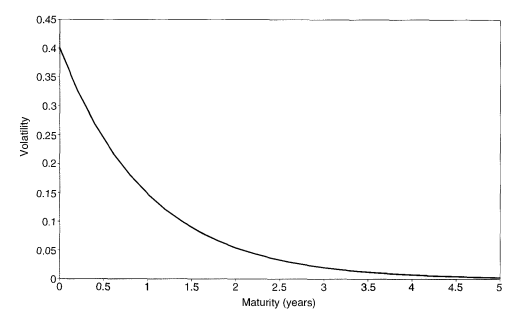
<blockquote style="text-align: center;"><b>FIGURE 2.1. A Negative Exponential Volatility Function for Forward Prices</b></blockquote>

Figure 2.2 shows the evolution of a forward curve after a positive shock $dz(t) \geq 0$ over a small time step $dt$ occured.

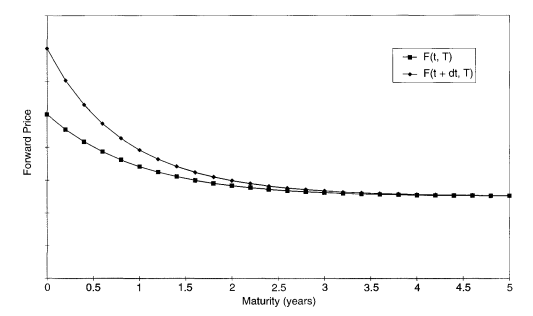
<blockquote style="text-align: center;"><b>FIGURE 2.2 Evolution of the Forward Price Curve</b></blockquote>

We can generalize this single factor model with a function  $\sigma(t,T)$ representing the forward price return volatility at time $t$ of maturity $T$:

<p style="text-align: right;"><b>2.3</b></p>

### <blockquote style="text-align: center;">$\frac{dF(t,T)}{F(t,T)} = \sigma(t,T)dz(t)$</blockquote>

<h4 style="text-align: left;">2.2  A General Multi Factor Model</h4>

The dynamics of the forward curve in a general multi-factor model can be described by the following equation:

<p style="text-align: right;"><b>2.3</b></p>

### <blockquote style="text-align: center;">$\frac{dF(t,T)}{F(t,T)} = \sum_{i=1}^{n} \sigma_i(t,T)dz_i(t)$</blockquote>

This formulation accounts for $n$ distinct sources of uncertainty, each driving the evolution of the forward curve. Each of these sources of uncertainty is associated with a volatility function that specifies the extent and direction of the random shock affecting each point on the forward curve. The $\sigma_i(t,T)$ correspond to the n volatility functions that pertain to the independent sources $dz_i(t)$.

The formalism implies that the dynamics of forward curves are ideal for principal component analysis (PCA), where every principal component signifies a distinct volatility factor that we can refer to as "eigen-volatility curves." The eigen-curves arise from the covariances among returns of forward prices. In general, only three eigen-curves are adequate to capture most of the covariance. Thus, we can reduce the multi-factor model to:
<p style="text-align: right;"><b>2.4</b></p>

### <blockquote style="text-align: center;">$\frac{dF(t,T)}{F(t,T)} = \sigma_1(t,T)dz_1(t) + \sigma_2(t,T)dz_2(t) + \sigma_3(t,T)dz_3(t)$</blockquote>

Where $\sigma_1(.)$ , $\sigma_2(.)$, and $\sigma_3(.)$ are typically referred in the literature as the "shift", "twist", and "bend" factors, respectively.

<h2 style="text-align: center;">3. Historical Estimation of the Forward Curve Volatility Functions</h2>

Moving forward, our analysis will focus on NYMEX Natural Gas Futures spanning a period of 5 months, starting from December 2022 and ending in April 2023. The futures contracts will cover maturities up to 24 months, as displayed below:
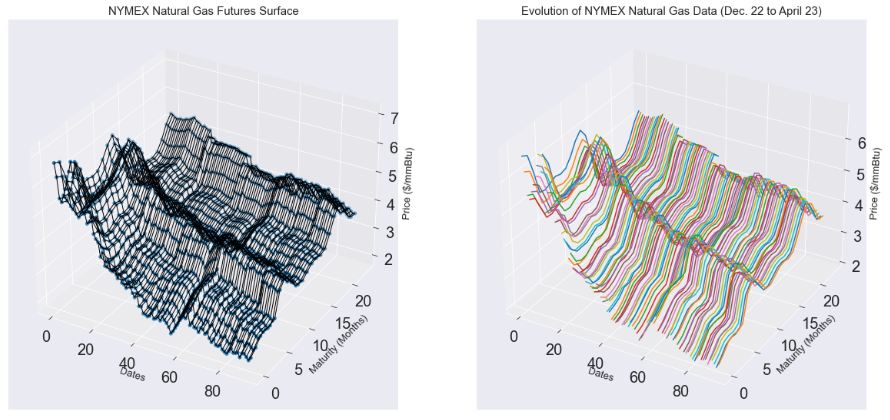

<blockquote style="text-align: center;"><b>FIGURE 3.1 Evolution of NYMEX Natural Gas Futures Curves from December 2022 to April 2023</b></blockquote>

Two important observations can be made regarding this data. Firstly, as per our earlier formalism, the prices for shorter maturities exhibit greater volatility in comparison to those of longer maturities. Secondly, there is a discernible seasonality pattern in the curves that corresponds to the seasonal changes in the Northern Hemisphere.

<h4 style="text-align: left;">3.1 Principal Component Analysis</h4>

We will now demonstrate how to extract the overall volatility functions from historical data on the forward curve. Our method enables the user to determine both the shape of the volatility functions and the optimal number of factors to use. The multi-factor forward curve model presented in this chapter can be expressed in logarithmic form, following an application of Ito's Lemma, as:
<p style="text-align: right;"><b>3.1</b></p>

### <blockquote style="text-align: center;">$\ln(dF(t,T)) = -\frac{1}{2} \sum_{i=1}^{n} {\sigma_i(t,T)}^2 dt + \sum_{i=1}^{n} \sigma_i(t,T) dz_i(t)$</blockquote>

Which can be discretized as follows:

<p style="text-align: right;"><b>3.2</b></p>

### <blockquote style="text-align: center;">$\Delta \ln(dF(t,t+\tau_j)) = -\frac{1}{2} \sum_{i=1}^{n} {\sigma_i(t,t+\tau_j)}^2 \Delta t + \sum_{i=1}^{n} \sigma_i(t,t+\tau_j) \Delta z_i$</blockquote>

Equation (3.2) shows that the logarithmic returns with relative maturities $\tau_j, j=1,...,m$ are distributed jointly according to a normal distribution. We can calculate the sample covariance matrix of these forward prices using the standard method:
<p style="text-align: right;"><b>3.3</b></p>

### <blockquote style="text-align: center;">$\hat{\sigma_{ij}} = \frac{1}{N} \sum_{k=1}^{N}(x_{ik}-\bar{x_i})(x_{jk}-\bar{x_j})$</blockquote>

Where there are $N$ samples $(k=1,...,N)$ of $x_{ik}$ and $x_{jk}$ which are defined further by:
<p style="text-align: right;"><b>3.4</b></p>

### <blockquote style="text-align: center;">$x_{ik} = \ln(F(t_k,t_k+\tau_i)) - \ln(F(t_k-\Delta t,t_k - \Delta t + \tau_i))$</blockquote>

Where $\bar{x_i}$ and $\bar{x_j}$ are sample means and the time interval $\Delta t$ is one day. The volatility functions $\sigma_i(t,t+\tau_j)$ can be obtained through the singular value decomposition (SVD) of the covariance matrix $\Sigma$, which extracts the $n$ independent factors (eigen-curves $v_i$ and eigen values $\lambda_i$) responsible for the evolution of the underlying variables such that:
<p style="text-align: right;"><b>3.5</b></p>

### <blockquote style="text-align: center;">$\Sigma = \Gamma \Lambda \Gamma^T$</blockquote>
Where
#### <blockquote style="text-align: center;">$\Gamma = \begin{bmatrix}
v_11 & v_12 & ... & v_1n \\
v_21 & v_22 & ... & v_2n \\
... & ... & ... & ... \\
v_n1 & v_n2 & ... & v_nn
\end{bmatrix}$</blockquote>

#### <blockquote style="text-align: center;">$\Lambda = \begin{bmatrix}
\lambda_1 & 0 & ... & 0 \\
0 & \lambda_2 & ... & 0 \\
... & ... & ... & ... \\
0 & 0 & ... & \lambda_n
\end{bmatrix}$</blockquote>

Each column of $\Gamma$ represents and eigen-curve and their respective eigen values represent the their variances such that:  $\sigma_i(t,t+\tau_j) = v_{ji} \sqrt{\lambda_i}$

<h4 style="text-align: left;">3.2 Analysis of NYMEX Natural Gas Futures</h4>

The first step is to construct a times series of log returns according to equtation (3.4) as shown below:
<blockquote style="text-align: center;"><b>FIGURE 3.2 Returns to NYMEX Natural Gas Futures Contracts</b></blockquote>

In [877]:
futures_log_returns

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-02,-0.070234,-0.072219,-0.072046,-0.061113,-0.057430,-0.055532,-0.053591,-0.054193,-0.053819,-0.051293,...,-0.004433,-0.002614,-0.002811,-0.003229,-0.003901,-0.004639,-0.004322,-0.009819,-0.008804,-0.006699
2022-12-05,-0.118878,-0.117702,-0.105321,-0.065958,-0.063968,-0.061351,-0.059126,-0.059829,-0.058340,-0.048940,...,-0.017691,-0.014378,-0.012748,-0.011150,-0.011098,-0.010988,-0.010080,-0.010349,-0.011661,-0.011454
2022-12-06,-0.019555,-0.019518,-0.016254,-0.021661,-0.021969,-0.021316,-0.020228,-0.019832,-0.018952,-0.021271,...,-0.022381,-0.024186,-0.022829,-0.021725,-0.020910,-0.020423,-0.020236,-0.013968,-0.009789,-0.007393
2022-12-07,0.045397,0.043481,0.049147,0.032640,0.031485,0.030224,0.027710,0.027824,0.026847,0.020877,...,0.001459,0.000989,0.000486,0.000000,0.000237,0.000240,0.000705,0.001976,0.002406,0.001901
2022-12-08,0.040913,0.035503,0.031658,0.032230,0.030315,0.028517,0.026358,0.025438,0.025339,0.023338,...,0.006540,0.005666,0.004847,0.004050,0.004263,0.005025,0.003516,0.004814,0.003599,0.005303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-10,0.077016,0.053503,0.043212,0.040775,0.039951,0.038647,0.024152,0.023124,0.022657,0.022580,...,0.017570,0.018642,0.019379,0.017428,0.018788,0.019751,0.019488,0.020987,0.022940,0.022522
2023-04-11,0.006425,-0.004244,-0.011601,-0.009088,-0.009167,-0.008501,-0.008741,-0.008178,-0.005141,-0.002942,...,-0.003198,-0.002936,-0.003731,-0.001548,-0.001610,-0.001506,0.000887,0.001448,0.003463,0.004551
2023-04-12,-0.043475,-0.036383,-0.032414,-0.031687,-0.031179,-0.028235,-0.016850,-0.016560,-0.016136,-0.016937,...,-0.014963,-0.016005,-0.015648,-0.016142,-0.016476,-0.016056,-0.016537,-0.016778,-0.020686,-0.021326


The box plot presented below provides evidence that the natural logarithm returns exhibit a normal distribution with a mean of zero and decreasing variance as the maturities increase. Aside from outliers, this is quite consistent with the formalism we introduced earlier.
<blockquote style="text-align: center;"><b>FIGURE 3.3 Box Plot of Returns vs Contract Maturity</b></blockquote>

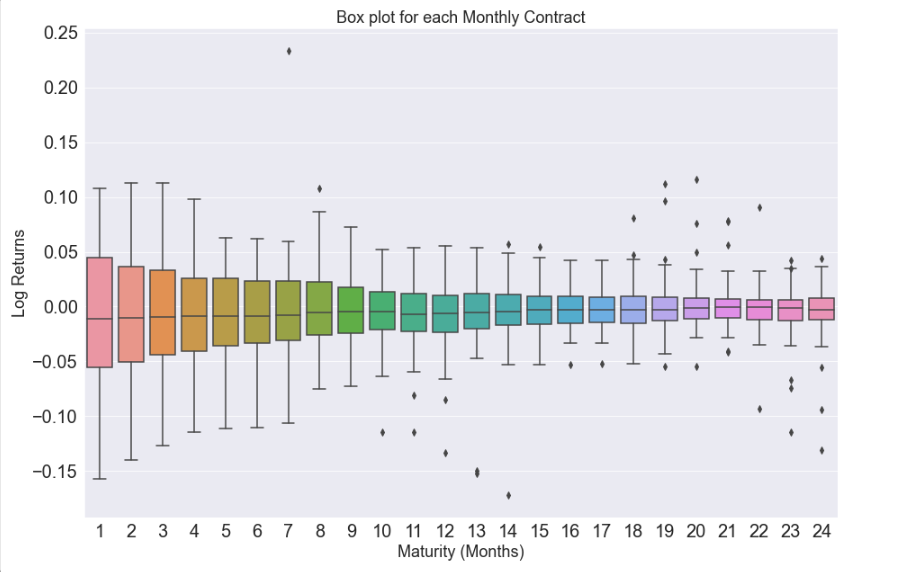

Now, we want to construct the covariance matrix of the returns:
<blockquote style="text-align: center;"><b>FIGURE 3.4 Covariance Matrix For NYMEX Natural Gas Futures</b></blockquote>

In [884]:
futures_covariance

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
1,0.003595,0.003088,0.002723,0.002258,0.002032,0.001943,0.001740,0.001508,0.001299,0.001162,...,0.000831,0.000742,0.000707,0.000696,0.000671,0.000517,0.000401,0.000354,0.000461,0.000570
2,0.003088,0.002970,0.002608,0.002132,0.001848,0.001769,0.001583,0.001378,0.001189,0.001062,...,0.000774,0.000686,0.000652,0.000643,0.000623,0.000478,0.000367,0.000322,0.000422,0.000530
3,0.002723,0.002608,0.002362,0.001964,0.001697,0.001621,0.001434,0.001274,0.001108,0.000994,...,0.000724,0.000647,0.000611,0.000594,0.000579,0.000461,0.000369,0.000321,0.000395,0.000471
4,0.002258,0.002132,0.001964,0.001758,0.001524,0.001459,0.001286,0.001138,0.000983,0.000886,...,0.000678,0.000610,0.000577,0.000560,0.000542,0.000432,0.000346,0.000296,0.000362,0.000431
5,0.002032,0.001848,0.001697,0.001524,0.001461,0.001350,0.001145,0.001144,0.001020,0.000895,...,0.000633,0.000582,0.000526,0.000476,0.000488,0.000475,0.000428,0.000343,0.000307,0.000267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,0.000517,0.000478,0.000461,0.000432,0.000475,0.000412,0.000546,0.000576,0.000415,0.000220,...,0.000328,0.000278,0.000247,0.000306,0.000425,0.000459,0.000331,0.000121,-0.000040,-0.000052
21,0.000401,0.000367,0.000369,0.000346,0.000428,0.000332,0.000191,0.000425,0.000428,0.000344,...,0.000253,0.000260,0.000206,0.000158,0.000223,0.000331,0.000366,0.000272,0.000119,-0.000054
22,0.000354,0.000322,0.000321,0.000296,0.000343,0.000276,-0.000032,0.000194,0.000334,0.000399,...,0.000163,0.000216,0.000177,0.000060,0.000026,0.000121,0.000272,0.000350,0.000305,0.000096
23,0.000461,0.000422,0.000395,0.000362,0.000307,0.000296,-0.000059,0.000038,0.000204,0.000364,...,0.000148,0.000200,0.000189,0.000071,-0.000036,-0.000040,0.000119,0.000305,0.000425,0.000325


From which we then apply the singular value decomposition to get our principal components:
<blockquote style="text-align: center;"><b>FIGURE 3.5 First 5 and Last 5 Principal Components and Their Associated Eigen Values</b></blockquote>

In [882]:
display(df_pca.iloc[:, :5].join(df_pca.iloc[:, -5:]))

,PC1,PC2,PC3,PC4,PC5,PC21,PC22,PC23,PC24,Explained Variance
0,-0.411123,-0.378432,-0.342492,-0.297414,-0.267312,-0.066065,-0.053074,-0.060683,-0.074814,1.890114e-02
1,-0.133509,-0.119521,-0.099541,-0.047400,-0.027213,0.025370,-0.218185,-0.332466,-0.150826,2.099127e-03
2,-0.105855,-0.111605,-0.050946,-0.016546,0.190012,0.364774,0.258220,-0.008707,-0.327166,1.734721e-03
3,0.376178,0.313228,0.200311,-0.003914,0.005408,-0.152079,-0.216984,-0.298620,-0.311834,1.167729e-03
4,0.122744,0.231625,0.153930,0.006928,-0.103363,0.153572,-0.009167,0.016162,-0.000053,4.929993e-04
...,...,...,...,...,...,...,...,...,...,...
19,-0.001589,0.005482,0.020484,-0.040536,-0.204715,-0.221681,0.122493,-0.032376,-0.022281,8.870051e-07
20,0.008926,-0.005025,-0.011590,0.010662,-0.129291,-0.391062,0.454623,-0.362079,0.058414,6.357859e-07
21,-0.002169,0.011113,-0.007662,-0.007112,-0.229259,0.053108,0.059534,-0.157922,0.070560,4.312128e-07
22,-0.004599,0.000761,-0.001059,-0.006753,0.104845,-0.034864,-0.024083,0.065262,-0.011564,3.012248e-07


We can generate a Scree Plot and see how much each eigen-curve explains the variance of the natural gas futures
<blockquote style="text-align: center;"><b>FIGURE 3.5 SCREE Plot For NYMEX Natural Gas Futures</b></blockquote>

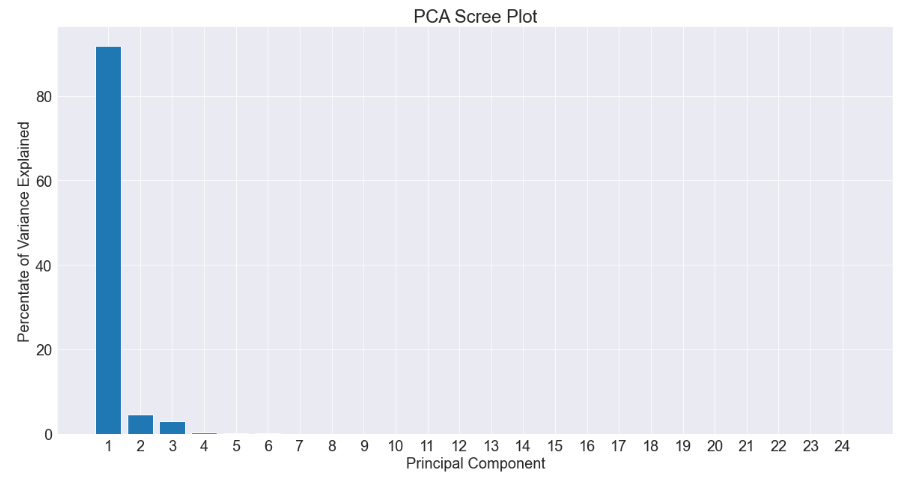

As mentioned earlier, three eigen-volatility curves representing the "shift", "twist", and "bend" factors can account for $98\%$ of the total variation in log returns. Notice a fourth factor is still present, this result is due to the seasonal patterns that are inherent in Natural Gas Futures. Figure (3.6) illustrates the second and third strongest eigen-volatility curves, which exhibit clear seasonality.
<blockquote style="text-align: center;"><b>FIGURE 3.6 First Three Volatility Factors of NYMEX Natural Gas Futures</b></blockquote>

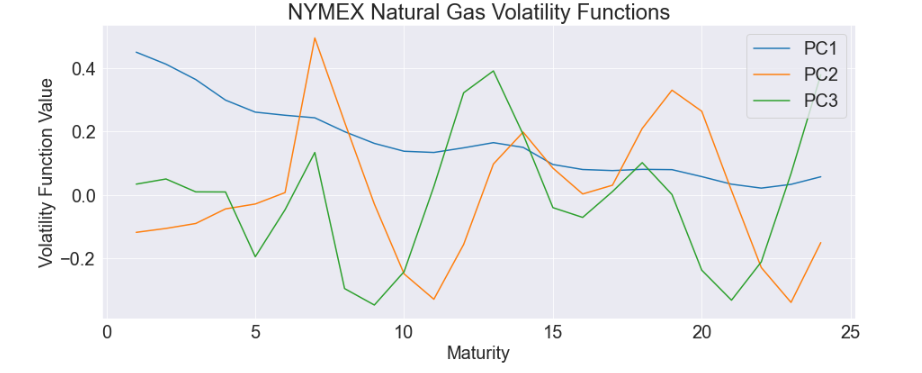

<h4 style="text-align: left;">3.3 Incorporating Seasonality into the Volatility Functions</h4>

To account for seasonality in the volatility functions, we can represent it as the multiplication of a time-dependent spot volatility function and maturity-dependent volatility functions. This allows us to specialize the general equation to incorporate seasonality, as shown below:
<p style="text-align: right;"><b>3.6</b></p>

### <blockquote style="text-align: center;">$\frac{dF(t,T)}{F(t,T)} = \sigma_s(t) \sum_{i=1}^{n} \sigma_i(T-t)dz_i(t)$</blockquote>

To model the spot volatility $\sigma_s(t)$, we use the shortest maturity future and take a rolling window of 30 day log returns. Below is the estimated spot daily return.

<blockquote style="text-align: center;"><b>FIGURE 3.4 Spot Daily Returns of NYMEX Natural Gas Futures</b></blockquote>

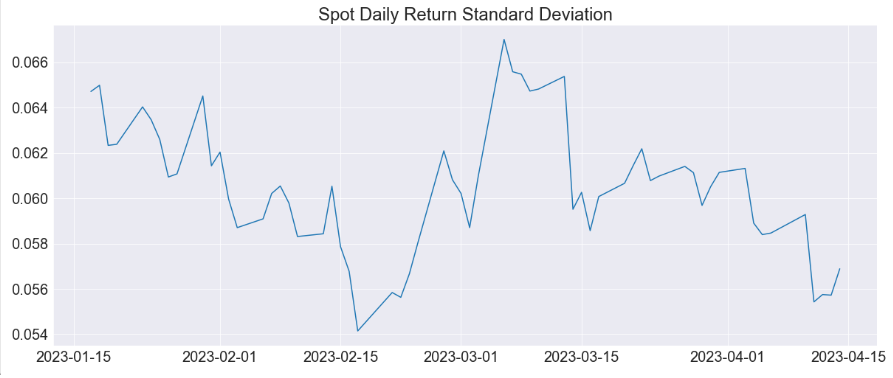

<blockquote style="text-align: center;"><b>FIGURE 3.5  Seasonally Adjusted Scree Plot</b></blockquote>

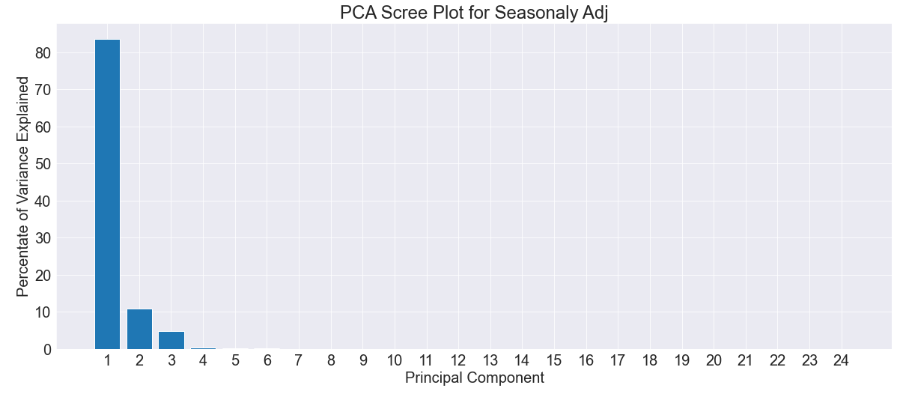

<blockquote style="text-align: center;"><b>FIGURE 3.6  Seasonally Adjusted Eigen-Volatility Curves</b></blockquote>

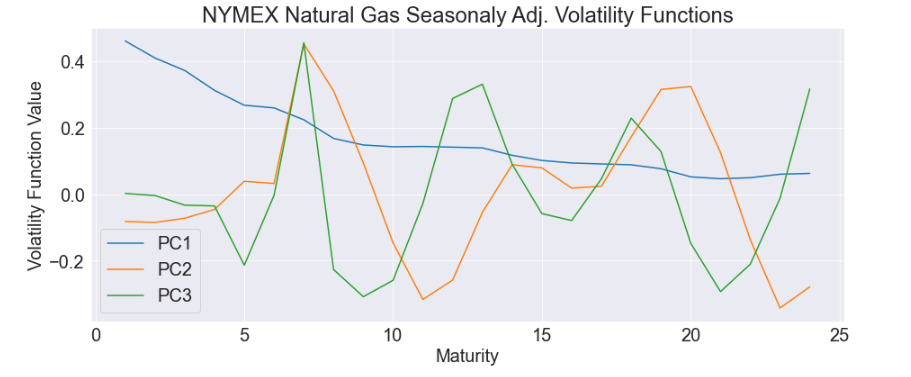

<h2 style="text-align: center;">4. Pricing Asian Options Under a Forward Curve Framework</h2>

<h4 style="text-align: left;">4.1 Monte Carlo Formalism</h4>
The approach we present is also applicable to other derivatives with path-dependent terminal payoffs, such as barrier and lookback options. For our purposes, we examine a fixed-strike European Asian call option with a maturity of $s_m$. The option's payoff is determined by the average of the $s_m$-maturity futures contracts observed at times $s_1,...,s_m$ with $s_1 \leq...\leq s_m$. Thus, the option value can be expressed as the discounted expected payoff:
<p style="text-align: right;"><b>4.1</b></p>

### <blockquote style="text-align: center;">$Asian(t;K,s_m, \{s_k\}) = P(t,s_m)\mathbb{E}[max(0,\{ \frac{1}{m}\sum_{k=1}^{m}F(s_k,s_m) \} - K)]$</blockquote>
Where $P(t,s_m)$ is the present value discount factor and $Asian(t;K,s_m, \{s_k\})$ reads as the price of an asian option at time $t$ with strike $K$, maturity $s_m$, and observed at times $\{s_k\}$.

It is worth mentioning that if the average of futures contracts with a consistent time to maturity of $\Delta s$ (such as 1 month) were computed on each observation date, the payoff would be formulated as:
<p style="text-align: right;"><b>4.2</b></p>

### <blockquote style="text-align: center;">$Asian(t;K,s_m, \{s_k\}) = P(t,s_m)\mathbb{E}[max(0,\{ \frac{1}{m}\sum_{k=1}^{m}F(s_k,s_k) + \Delta s\} - K)]$</blockquote>

To evaluate the expectation in equations (4.1) and (4.2), we must treat any contingent claim as a series of potentially contingent cash flows,$C_k(s_k,\Theta,\{ c_lF(s_k,s_l)\})$, occurring on dates $s_k$, $k=1,...,m$, which depend on forward prices with maturity dates also on the set of dates $s_k$. These cash flows have face values $c_k$ and also depend on the parameter vector $\Theta$. The price of such a contingent claim is given by: 
<p style="text-align: right;"><b>4.3</b></p>

### <blockquote style="text-align: center;">$C(t, \Theta, \{c_k\}, \{s_k\}) = \mathbb{E}[\sum_{k=1}^{m}P(t,s_k)C_k(s_k,\Theta,\{ c_lF(s_k,s_l)\})]$</blockquote>

To evaluate (4.3) using Monte-Carlo simulation, we need to calculate the covariance matrix $\Gamma$ of the correlated natural logarithms of the forward prices $\ln(F(s_k,s_l))$, which has dimensions of $m^{'}\times m^{'}$ (where $m^{'}=m^2$). The expectation is taken over this $m^{'}\times m^{'}$-dimensional normal distribution:
<p style="text-align: right;"><b>4.4</b></p>

### <blockquote style="text-align: center;">$\Sigma_{jk}=Cov[\ln(F(t_j,s_j)),\ln(F(t_k,s_k))] = \sum_{i=1}^{n}\{int_{t}^{min(t_j,t_k)}\sigma_i(u,s_j)\sigma_i(u,s_k)du\}$</blockquote>

To efficiently sample under the covariance matrix, we can compute the singular value decomposition, which yields the set of $m^{'}$ eigen-volatility curves $v_i$ and the corresponding $m^{'}$ eigen-variance values $\lambda_i$. This allows us to express equation (4.3) as:

<p style="text-align: right;"><b>4.5</b></p>

### <blockquote style="text-align: center;">$C(t, \Theta, \{c_k\}, \{s_k\}) = \frac{1}{M}\sum_{j=1}^{M}[\sum_{k=1}^{m}P(t,s_k)C_k(s_k,\Theta,\{ c_lF(t,s_l)Y_j(t,s_k,s_l)\})]$</blockquote>

where 

### <blockquote style="text-align: center;">$Y_j(t,s_k,s_l) = exp[-\frac{1}{2} \sum_{i=1}^{m^{'}} {v_{l^{'}i}}^2\lambda_i + \sum_{i=1}^{m^{'}} {v_{l^{'}i}}\sqrt{\lambda_i}\epsilon_i], l^{'} = kl$</blockquote>

Applying (4.5) to our example of Asian European option (4.1) grants us:
<p style="text-align: right;"><b>4.6</b></p>

### <blockquote style="text-align: center;">$Asian(t;K,s_m,\{s_k\}) = P(t,s_m)\frac{1}{M}\sum_{j=1}^{M}[max(0,\{ \frac{1}{m}\sum_{k=1}^{m}F(t,s_m)Y_j(t,s_k,s_m) \} - K)]$</blockquote>

<h4 style="text-align: left;">4.2.1 Results</h4>
<blockquote style="text-align: center;"><b>FIGURE 4.1 Simulated Call Price on NYMEX Natural Gas Futures for Differing Maturities</b></blockquote>

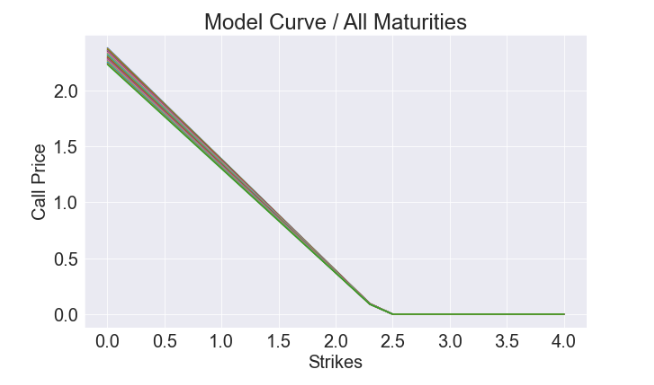

<blockquote style="text-align: center;"><b>FIGURE 4.2 Comparing Simulated Call Price on the 2 Month NYMEX Natural Gas Contract to the Market Price of European Call Option (Underlying Future Price is $2.3)</b></blockquote>

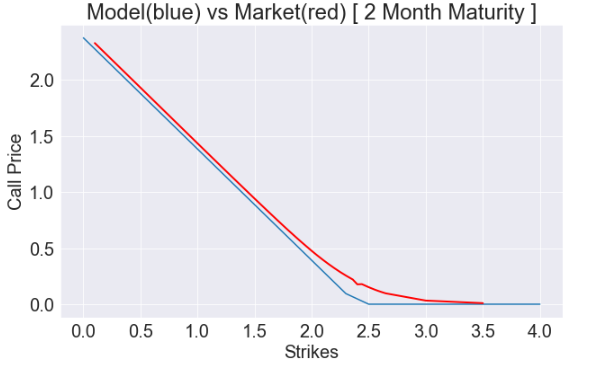

At present, NYMEX does not provide Asian options on Natural Gas Futures. However, vanilla European options are available. The predicted call price is marginally lower than the market price. As anticipated, the European Asian option price is generally lower than that of its Vanilla European equivalent.

In [1001]:
strike = 2
spot = 2.3
print(f'Using Low Discrepancy Sequence (Halton): At spot ${spot} and strike ${strike}')
for num_simulation in [1,10,100,1000,10000]:
    prices_mc = []
    for i in range(10):
        price_mc = price_asian_option(spot, strike, expiry, discount_rate, num_simulations)
        prices_mc.append(price_mc)
        
    print(f'{10*num_simulation} Simulations | mean={np.mean(prices_mc)} | stdv={np.std(prices_mc)}')

Using Low Discrepancy Sequence (Halton): At spot $2.3 and strike $2
10 Simulations | mean=0.2972986403188638 | stdv=0.0005001844206567241
100 Simulations | mean=0.2974346857615503 | stdv=0.0004692928059060169
1000 Simulations | mean=0.2973133437306824 | stdv=0.00048178350459842604
10000 Simulations | mean=0.2974195028746677 | stdv=0.0004767868656236345
100000 Simulations | mean=0.2974905699505151 | stdv=0.000428162627695422


In [1002]:
print(f'Using Pseudo Random Sequence (Mersenne Twister): At spot ${spot} and strike ${strike}')
for num_simulation in [1,10,100,1000,10000]:
    prices_mc = []
    for i in range(10):
        price_mc = price_asian_option(spot, strike, expiry, discount_rate, num_simulations, seq_type='pseudo')
        prices_mc.append(price_mc)
        
    print(f'{10*num_simulation} Simulations| mean={np.mean(prices_mc)} | stdv={np.std(prices_mc)}')

Using Pseudo Random Sequence (Mersenne Twister): At spot $2.3 and strike $2
10 Simulations| mean=0.2973326863930164 | stdv=0.0002312785983790096
100 Simulations| mean=0.2974319409452128 | stdv=0.0001685042430699576
1000 Simulations| mean=0.2974062685708526 | stdv=0.00015723387500524516
10000 Simulations| mean=0.2974979568778899 | stdv=0.00015589545432206776
100000 Simulations| mean=0.2974851449270803 | stdv=9.387209822975888e-05


With just a few simultations we get three orders of magnitude convergence on price. Surprisingly, the use of quasi-Monte Carlo sequences had little impact on performance compared to pseudo-random sequences. In fact, in some cases, the pseudo-random sequence performed slightly better.

<h4 style="text-align: left;">4.2.2 Variance Reduction</h4>
Using Antithetic Variates, the variance was reduced significantly by two orders of magnitude.

In [1003]:
print(f'Appying Antithetic Variance Method: At spot ${spot} and strike ${strike}')
for num_simulation in [1,10,100,1000,10000]:
    prices_mc = []
    for i in range(10):
        price_mc = price_aop_antithetic(spot, strike, expiry, discount_rate, num_simulations, seq_type='pseudo')
        prices_mc.append(price_mc)
        
    print(f'{10*num_simulation} Simulations| mean={np.mean(prices_mc)} and stdv={np.std(prices_mc)}')

Appying Antithetic Variance Method: At spot $2.3 and strike $2
10 Simulations| mean=0.29737158519546814 and stdv=1.3844921312605009e-08
100 Simulations| mean=0.2973715747124388 and stdv=1.4305834773200004e-08
1000 Simulations| mean=0.2973715918269373 and stdv=2.168180839081926e-08
10000 Simulations| mean=0.29737158190284646 and stdv=1.3240386444194922e-08
100000 Simulations| mean=0.29737158691105264 and stdv=2.392599414379448e-08


By employing an antithetic variate, the simulated curves are re-evaluated, resulting in a much smoother price curve for all maturities.

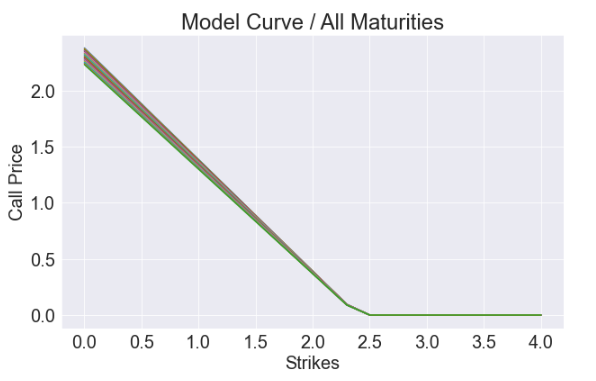

<h2 style="text-align: center;">5. Conclusion</h2>

<h4 style="text-align: left;">5.1 Summary</h4>
Asian options are widely used in various industries for hedging purposes, making the development of an accurate pricing model crucial. However, traditional Monte Carlo simulations can be computationally expensive as they require simulating paths at a daily granularity. The forward curve framework can address this issue by utilizing PCA to reduce the dimensionality of the covariance matrix, resulting in significant efficiency gains at the cost of some accuracy in simulating option prices. Moreover, the model utilizes real-world data to inform the simulation, providing more realistic pricing results. As expected, the simulated prices for Asian options were slightly lower than their vanilla counterparts. Interestingly, using low discrepancy sequences had little impact on pricing performance, while employing antithetic variates led to a significant reduction in variance (by five orders of magnitude).

<h4 style="text-align: left;">5.2 Moving Forward</h4>
There are several avenues worth exploring in future research. Firstly, incorporating control variates could be beneficial, and geometric Asian options are often used as a control variate in pricing arithmetic Asian options. Secondly, while NYMEX does not offer Asian options on Natural Gas Futures, CME offers European Asian options on crude oil futures, making a comparison between the forward curve framework and WTI Asian options market prices worthwhile. Additionally, NYMEX also offers COB electricity futures which exhibit much greater volatility than even Natural Gas. It would be worth investigating the performance of this forward framework on them. 

<h2 style="text-align: center;">6. References</h2>

<ol>
<li>Clewlow, L., & Strickland, C. (n.d.). Energy Derivatives: Pricing and Risk Management. LACIMA PUBLICATIONS..
<li>https://www.cmegroup.com/education/articles-and-reports/energy-average-price-options.html
</ol>

<h2 style="text-align: center;">7. Codes</h2>
<h4 style="text-align: left;">7.1 Modules & Data Acquisition</h4>

In [4]:
import requests
import seaborn as sns
from requests.exceptions import HTTPError
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime, timedelta
from sklearn.decomposition import PCA
from scipy.stats import norm, uniform, qmc

In [5]:
EIA_API_KEY = 'tex3ihBPy4HSa7PFc0l3IoqO3Sw8C7BzI6eKg5ob'
try:
    response = requests.get(
        f'https://api.eia.gov/v2/natural-gas/pri/fut/data/?api_key={EIA_API_KEY}&frequency=daily&data[0]=value&facets[series][]=RNGC1&facets[series][]=RNGC2&facets[series][]=RNGC3&facets[series][]=RNGC4&start=2022-10-01&end=2023-04-14&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000',
    )
    # If the response was successful, no Exception will be raised
    response.raise_for_status()
except HTTPError as http_err:
    print(f'HTTP error occurred: {http_err}')  # Python 3.6
except Exception as err:
    print(f'Other error occurred: {err}')  # Python 3.6

json_response = response.json()
data = json_response['response']['data']

futures_curve1 = pd.DataFrame (data)
futures_curve1 = futures_curve1.loc[:, ['period', 'process-name', 'value']]
# Pivot the DataFrame
futures_curve1 = futures_curve1.pivot(index='period', columns='process-name', values='value')
# Reset index
futures_curve1.reset_index(inplace=True)
futures_curve1.rename(columns={"period": "Date", "Future Contract 1": "1", "Future Contract 2": "2", "Future Contract 3": "3", "Future Contract 4": "4"}, inplace=True)
futures_curve1['Date'] = pd.to_datetime(futures_curve1['Date'], format="%Y-%m-%d")
futures_curve1 = futures_curve1.set_index('Date')

In [6]:
contract_months = {
    '01': 'F',  #January
    '02': 'G',  #February
    '03': 'H',  #March
    '04': 'J',  #April
    '05': 'K',  #May
    '06': 'M',  #June
    '07': 'N',  #July
    '08': 'Q',  #August
    '09': 'U',  #September
    '10': 'V',  #October
    '11': 'X',  #November
    '12': 'Z'   #December
}

def create_contracts_list(start="2023-04-20", end="2025-04-20"):
    
    # Convert the start and end dates to datetime objects
    #start_date = datetime.strptime(start, "%Y-%m-%d")
    #end_date = datetime.strptime(end, "%Y-%m-%d")
    start_date = start
    end_date = end
    
    contract_list = []
    
    # Loop through each month and year in the date range
    current_date = start_date
    while current_date <= end_date+timedelta(days=32): # timedelta(days=32) to include end_date
        # Extract the month and year from the current date
        month = current_date.strftime("%m")
        year = current_date.strftime("%y")

        # Append the month and year to the list
        contract_list.append(f'NG{contract_months[month]}{year}.NYM')

        # Move to the next month
        current_date += timedelta(days=32)
    return contract_list

def fetch_futures_curve(date='2023-04-22'):
    
    # Gets futures curve for entire month provided, maturites go out 24 months
    date = datetime.strptime(date, "%Y-%m-%d")
    
    start_date = date + timedelta(days=160) # 4th month
    end_date = date + timedelta(days=731+32) # 2 years out
    
    contracts = create_contracts_list(start_date, end_date)
    
    # Get the beginning of the month
    beginning_of_month = datetime(date.year, date.month, 1)

    # Get the end of the month
    if date.month == 12:
        end_of_month = datetime(date.year + 1, 1, 1) - timedelta(days=1)
    else:
        end_of_month = datetime(date.year, date.month + 1, 1) - timedelta(days=1)

    
    # Fetch futures prices
    futures_data = yf.download(contracts, beginning_of_month.strftime("%Y-%m-%d"), end_of_month.strftime("%Y-%m-%d"))

    # Set the index to a datetime type
    futures_data.index = pd.to_datetime(futures_data.index)

    futures_curve = futures_data['Adj Close']
    # Rearrange the columns in ascending order
    futures_curve = futures_curve[sorted(futures_curve.columns, key=lambda x: int(x[3:5]))]
    
    
    futures_curve.columns=[
        '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 
        '15', '16', '17', '18', '19', '20', '21', '22', '23','24'
    ]
   
    
    return futures_curve

In [7]:
curve1 = fetch_futures_curve('2023-04-22')
curve2 = fetch_futures_curve('2023-03-20')
curve3 = fetch_futures_curve('2023-02-20')
curve4 = fetch_futures_curve('2023-01-20')
curve5 = fetch_futures_curve('2022-12-20')

frames = [curve5, curve4, curve3, curve2, curve1]
futures_curve2 = pd.concat(frames)

[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  20 of 20 completed


In [8]:
pd.set_option('display.max_rows', 10)
futures_curve = pd.concat([futures_curve1,futures_curve2], axis=1)
futures_curve = futures_curve.dropna()
futures_curve

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-01,6.738,6.631,5.999,5.246,5.196,5.276,5.366,5.308,5.363,5.620,...,4.296,4.214,4.275,4.343,4.366,4.321,4.406,4.708,5.134,5.392
2022-12-02,6.281,6.169,5.582,4.935,4.906,4.991,5.086,5.028,5.082,5.339,...,4.277,4.203,4.263,4.329,4.349,4.301,4.387,4.662,5.089,5.356
2022-12-05,5.577,5.484,5.024,4.620,4.602,4.694,4.794,4.736,4.794,5.084,...,4.202,4.143,4.209,4.281,4.301,4.254,4.343,4.614,5.030,5.295
2022-12-06,5.469,5.378,4.943,4.521,4.502,4.595,4.698,4.643,4.704,4.977,...,4.109,4.044,4.114,4.189,4.212,4.168,4.256,4.550,4.981,5.256
2022-12-07,5.723,5.617,5.192,4.671,4.646,4.736,4.830,4.774,4.832,5.082,...,4.115,4.048,4.116,4.189,4.213,4.169,4.259,4.559,4.993,5.266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-10,2.172,2.361,2.601,2.653,2.630,2.717,3.562,3.806,3.705,3.404,...,3.445,3.411,3.491,3.878,4.352,4.653,4.508,4.141,3.748,3.727
2023-04-11,2.186,2.351,2.571,2.629,2.606,2.694,3.531,3.775,3.686,3.394,...,3.434,3.401,3.478,3.872,4.345,4.646,4.512,4.147,3.761,3.744
2023-04-12,2.093,2.267,2.489,2.547,2.526,2.619,3.472,3.713,3.627,3.337,...,3.383,3.347,3.424,3.810,4.274,4.572,4.438,4.078,3.684,3.665


<h4 style="text-align: left;">7.2 Calculating Principal Components</h4>

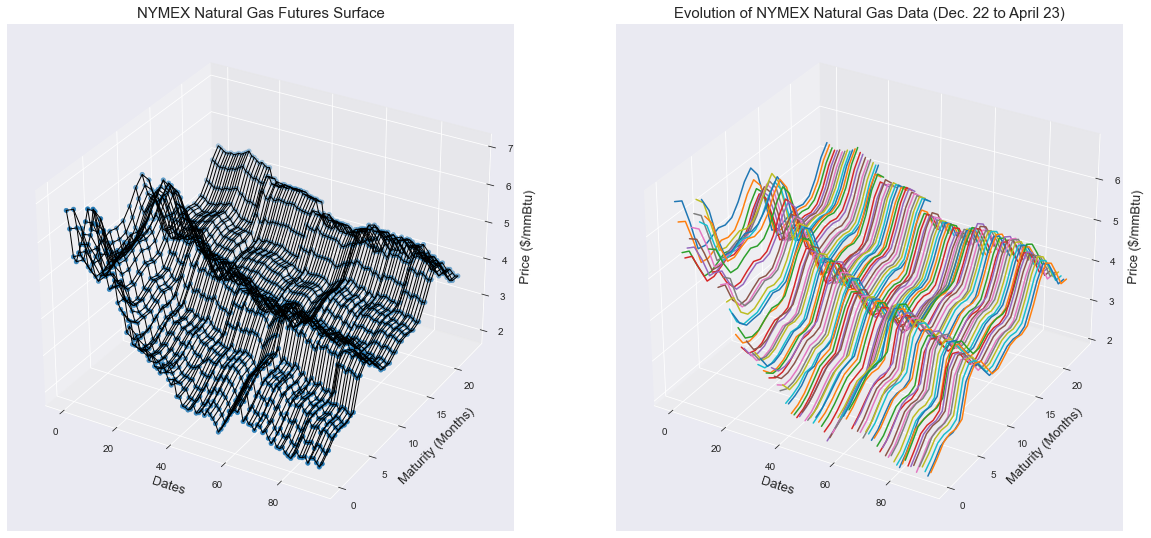

In [9]:
sns.set_style ("darkgrid")
x = np.arange(len(futures_curve.index))
y = np.arange(len(futures_curve.columns))
# Create a grid of X, Y, and Z values
X, Y = np.meshgrid(x, y, indexing='ij')
Z = futures_curve.values
# Create a 3D scatter plot
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121, projection='3d')
# Plot the scatter points
ax1.scatter(X, Y, Z, cmap='viridis', linewidth=0.5)
# Plot the lines connecting the data points along the y-axis and x-axis value
for i in range(len(futures_curve.columns)):
    ax1.plot(x, i*np.ones(len(x)), futures_curve.iloc[:, i].values, color='k', linewidth=1)    
for i in range(len(x)):
    ax1.plot(np.full(len(y), x[i]), y, futures_curve.iloc[i, :].values, color='k', linewidth=1)

ax1.set_xlabel('Dates', fontsize=13)
ax1.set_ylabel('Maturity (Months)', fontsize=13)
ax1.set_zlabel('Price ($/mmBtu)', fontsize=13)
ax1.set_title('NYMEX Natural Gas Futures Surface', fontsize=15)

ax2 = fig.add_subplot(122, projection='3d')
for i in range(len(x)):
    ax2.plot(np.full(len(y), x[i]), y, futures_curve.iloc[i, :].values, label=futures_curve.index[i])

ax2.set_xlabel('Dates', fontsize=13)
ax2.set_ylabel('Maturity (Months)', fontsize=13)
ax2.set_zlabel('Price ($/mmBtu)', fontsize=13)
ax2.set_title('Evolution of NYMEX Natural Gas Data (Dec. 22 to April 23)', fontsize=15)
plt.show()

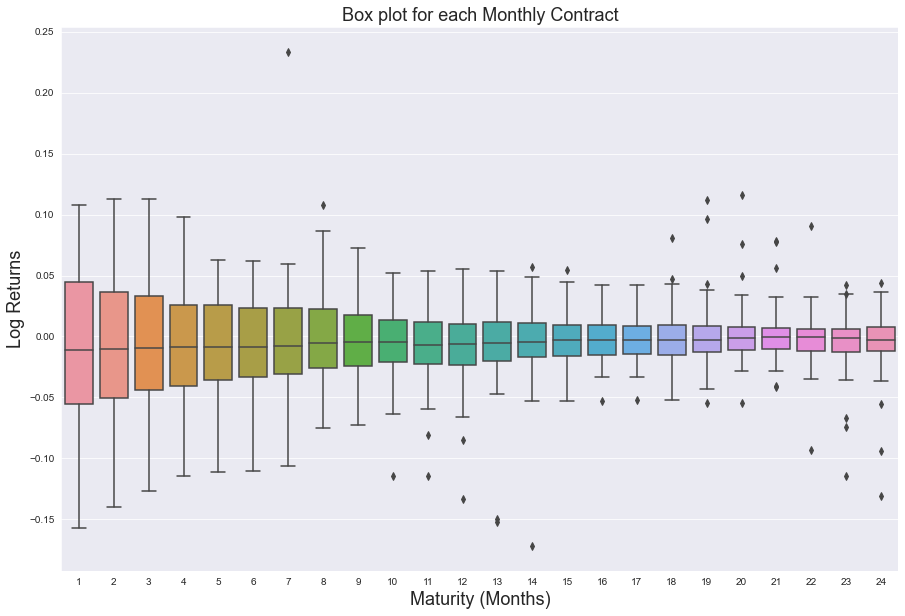

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=np.log(futures_curve / futures_curve.shift(1)), ax=ax)
plt.title('Box plot for each Monthly Contract', fontsize=18)
plt.xlabel('Maturity (Months)', fontsize=18)
plt.ylabel('Log Returns', fontsize=18)
plt.show()

In [11]:
futures_log_returns = np.log(futures_curve / futures_curve.shift(1)).tail(-1)
futures_log_returns

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-02,-0.070234,-0.072219,-0.072046,-0.061113,-0.057430,-0.055532,-0.053591,-0.054193,-0.053819,-0.051293,...,-0.004433,-0.002614,-0.002811,-0.003229,-0.003901,-0.004639,-0.004322,-0.009819,-0.008804,-0.006699
2022-12-05,-0.118878,-0.117702,-0.105321,-0.065958,-0.063968,-0.061351,-0.059126,-0.059829,-0.058340,-0.048940,...,-0.017691,-0.014378,-0.012748,-0.011150,-0.011098,-0.010988,-0.010080,-0.010349,-0.011661,-0.011454
2022-12-06,-0.019555,-0.019518,-0.016254,-0.021661,-0.021969,-0.021316,-0.020228,-0.019832,-0.018952,-0.021271,...,-0.022381,-0.024186,-0.022829,-0.021725,-0.020910,-0.020423,-0.020236,-0.013968,-0.009789,-0.007393
2022-12-07,0.045397,0.043481,0.049147,0.032640,0.031485,0.030224,0.027710,0.027824,0.026847,0.020877,...,0.001459,0.000989,0.000486,0.000000,0.000237,0.000240,0.000705,0.001976,0.002406,0.001901
2022-12-08,0.040913,0.035503,0.031658,0.032230,0.030315,0.028517,0.026358,0.025438,0.025339,0.023338,...,0.006540,0.005666,0.004847,0.004050,0.004263,0.005025,0.003516,0.004814,0.003599,0.005303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-10,0.077016,0.053503,0.043212,0.040775,0.039951,0.038647,0.024152,0.023124,0.022657,0.022580,...,0.017570,0.018642,0.019379,0.017428,0.018788,0.019751,0.019488,0.020987,0.022940,0.022522
2023-04-11,0.006425,-0.004244,-0.011601,-0.009088,-0.009167,-0.008501,-0.008741,-0.008178,-0.005141,-0.002942,...,-0.003198,-0.002936,-0.003731,-0.001548,-0.001610,-0.001506,0.000887,0.001448,0.003463,0.004551
2023-04-12,-0.043475,-0.036383,-0.032414,-0.031687,-0.031179,-0.028235,-0.016850,-0.016560,-0.016136,-0.016937,...,-0.014963,-0.016005,-0.015648,-0.016142,-0.016476,-0.016056,-0.016537,-0.016778,-0.020686,-0.021326


In [12]:
futures_covariance = futures_log_returns.cov()
futures_covariance

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
1,0.003595,0.003088,0.002723,0.002258,0.002032,0.001943,0.001740,0.001508,0.001299,0.001162,...,0.000831,0.000742,0.000707,0.000696,0.000671,0.000517,0.000401,0.000354,0.000461,0.000570
2,0.003088,0.002970,0.002608,0.002132,0.001848,0.001769,0.001583,0.001378,0.001189,0.001062,...,0.000774,0.000686,0.000652,0.000643,0.000623,0.000478,0.000367,0.000322,0.000422,0.000530
3,0.002723,0.002608,0.002362,0.001964,0.001697,0.001621,0.001434,0.001274,0.001108,0.000994,...,0.000724,0.000647,0.000611,0.000594,0.000579,0.000461,0.000369,0.000321,0.000395,0.000471
4,0.002258,0.002132,0.001964,0.001758,0.001524,0.001459,0.001286,0.001138,0.000983,0.000886,...,0.000678,0.000610,0.000577,0.000560,0.000542,0.000432,0.000346,0.000296,0.000362,0.000431
5,0.002032,0.001848,0.001697,0.001524,0.001461,0.001350,0.001145,0.001144,0.001020,0.000895,...,0.000633,0.000582,0.000526,0.000476,0.000488,0.000475,0.000428,0.000343,0.000307,0.000267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,0.000517,0.000478,0.000461,0.000432,0.000475,0.000412,0.000546,0.000576,0.000415,0.000220,...,0.000328,0.000278,0.000247,0.000306,0.000425,0.000459,0.000331,0.000121,-0.000040,-0.000052
21,0.000401,0.000367,0.000369,0.000346,0.000428,0.000332,0.000191,0.000425,0.000428,0.000344,...,0.000253,0.000260,0.000206,0.000158,0.000223,0.000331,0.000366,0.000272,0.000119,-0.000054
22,0.000354,0.000322,0.000321,0.000296,0.000343,0.000276,-0.000032,0.000194,0.000334,0.000399,...,0.000163,0.000216,0.000177,0.000060,0.000026,0.000121,0.000272,0.000350,0.000305,0.000096
23,0.000461,0.000422,0.000395,0.000362,0.000307,0.000296,-0.000059,0.000038,0.000204,0.000364,...,0.000148,0.000200,0.000189,0.000071,-0.000036,-0.000040,0.000119,0.000305,0.000425,0.000325


In [13]:
pca = PCA(n_components=24)
pca.fit(futures_covariance)
pc_list = ['PC{}'.format(i) for i in range(1, 25)]
df_components = pd.DataFrame(pca.components_, columns=pc_list)
df_explained_variance = pd.DataFrame(pca.explained_variance_, columns=['Explained Variance'])
df_pca = pd.concat([df_components, df_explained_variance], axis=1)
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,Explained Variance
0,0.449839,0.412006,0.363490,0.298574,0.260642,0.250794,0.242761,0.199085,0.162070,0.137228,...,0.079639,0.076276,0.080168,0.079213,0.057191,0.033311,0.020922,0.032767,0.056746,3.799252e-06
1,-0.118668,-0.106268,-0.090684,-0.044605,-0.029221,0.006797,0.494704,0.229342,-0.029324,-0.249781,...,0.002439,0.030010,0.209145,0.329978,0.263419,0.013039,-0.229669,-0.339731,-0.151064,1.912279e-07
2,0.033468,0.049774,0.009077,0.008762,-0.195663,-0.047292,0.133387,-0.296013,-0.347958,-0.242645,...,-0.071498,0.009949,0.101245,0.000597,-0.237977,-0.332728,-0.211869,0.066795,0.378900,1.260317e-07
3,-0.277551,-0.323670,-0.192479,0.046814,0.147427,0.275777,0.565804,0.049474,0.136746,0.236849,...,-0.055179,0.037797,0.042836,-0.134483,-0.157439,-0.104401,0.050562,0.043863,0.049445,1.105074e-08
4,0.515721,0.183648,0.016810,-0.261374,-0.188218,-0.076506,0.351945,-0.145317,-0.104818,-0.101250,...,-0.164235,-0.063809,0.040343,-0.021151,-0.041350,-0.040960,0.044992,-0.018993,0.000583,7.220869e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,0.012728,0.009546,-0.028946,-0.002317,-0.126102,0.122694,-0.036920,0.029115,-0.025314,-0.094234,...,0.016555,0.133246,-0.085596,0.008817,0.032791,-0.177702,0.646983,-0.541860,0.194015,2.852066e-14
20,0.001182,-0.005256,-0.000294,0.003176,0.252813,-0.386797,0.139714,-0.064647,0.200324,-0.356399,...,-0.003467,0.114722,0.137780,-0.137180,-0.021698,0.085764,-0.098664,0.203952,-0.044312,8.226476e-15
21,0.002663,-0.014798,0.019518,0.010102,-0.005344,0.174745,-0.132230,-0.200672,0.393479,-0.382113,...,-0.196653,-0.129252,0.281015,-0.313052,0.375089,-0.286848,0.053224,-0.056471,-0.072235,7.405046e-15
22,-0.005697,-0.008250,0.017794,-0.005521,0.061932,-0.009672,0.042101,-0.153716,0.235641,-0.212096,...,0.720047,-0.242932,-0.304494,0.209570,0.067674,-0.239998,-0.026721,0.027651,-0.054519,1.448524e-15


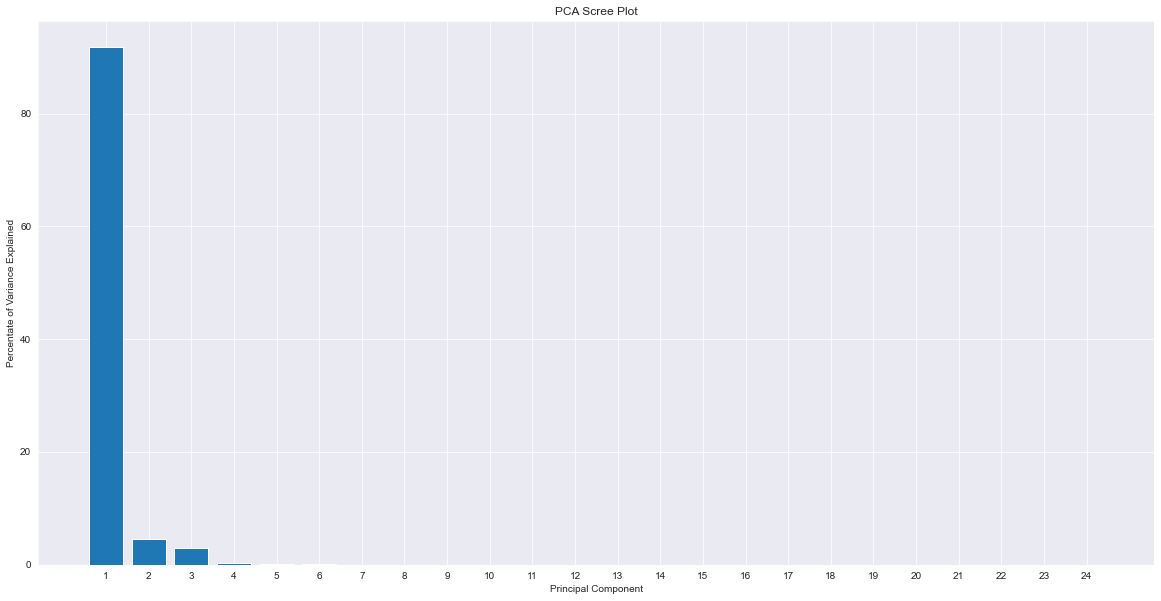

In [14]:
columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
plt.figure(figsize=(20,10))
plt.bar(x= range(1,25), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

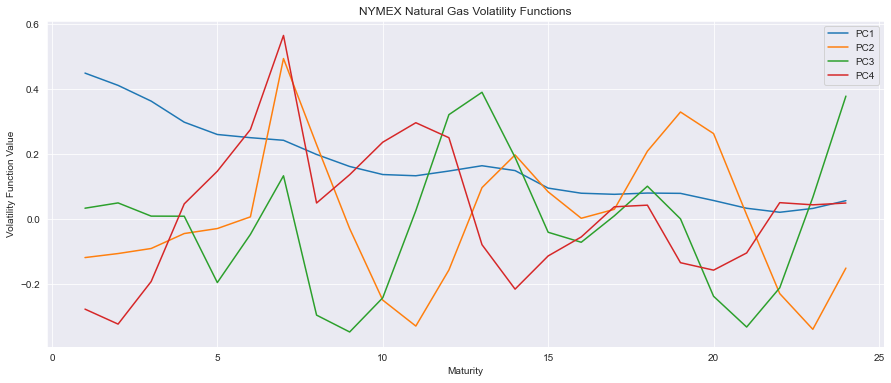

In [15]:
plt.figure(figsize=(15, 6))
colors = ['r', 'g', 'b', 'c']  # Colors for each component
labels = [f'PC{i+1}' for i in range(pca.n_components_)]  # Labels for each component
for i in range(4):
    plt.plot(np.arange(1, 25), pca.components_[i], linestyle='-', label=labels[i])
plt.xlabel('Maturity')
plt.ylabel('Volatility Function Value')  # Update with your desired y-axis label
plt.title('NYMEX Natural Gas Volatility Functions')
plt.legend()
plt.show()

<h4 style="text-align: left;">7.3 Incorporating Seasonality</h4>

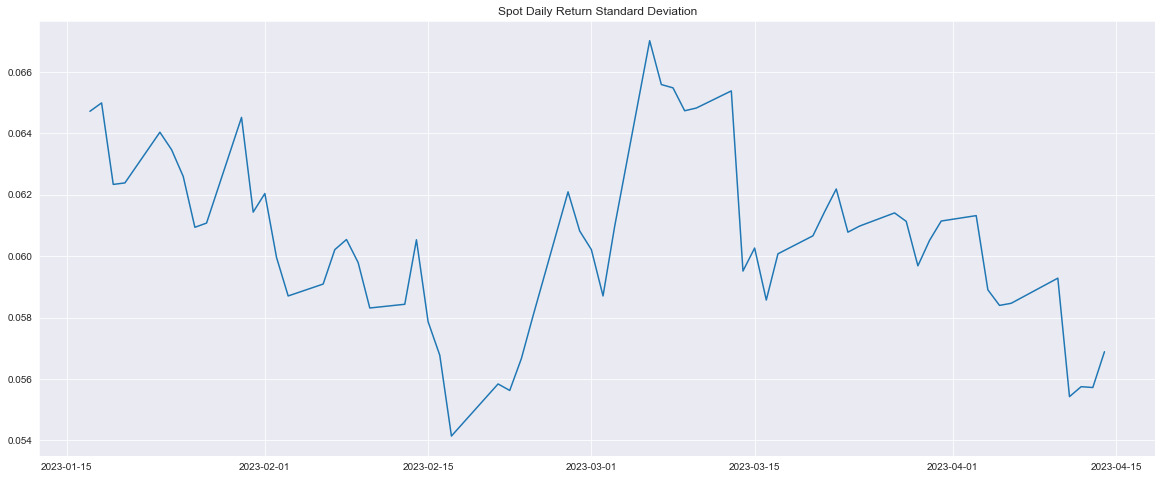

In [16]:
spot_curve = futures_curve.iloc[:, 0]
spot_log_returns = np.log(spot_curve).diff()
rolling_std = spot_log_returns.rolling(window=30).std()
plt.figure(figsize=(20,8))
plt.plot(rolling_std)
plt.title('Spot Daily Return Standard Deviation')
plt.show()

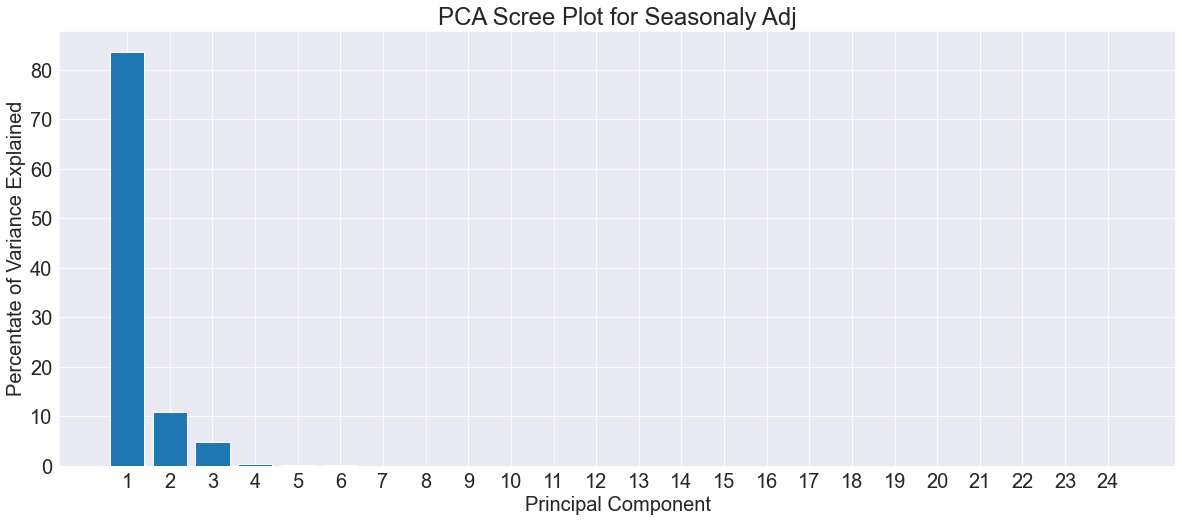

In [995]:
seasonaly_adj_returns = np.log(futures_curve / futures_curve.shift(1)).tail(-1).loc['2023-01-17':]
seasonaly_adj_returns = seasonaly_adj_returns.apply(lambda x: x.div(rolling_std.loc['2023-01-17':]), axis=0)
seasonaly_adj_covariance = seasonaly_adj_returns.cov()
pca = PCA(n_components=24)
pca.fit(seasonaly_adj_covariance)

columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
plt.figure(figsize=(20,8))
plt.bar(x= range(1,25), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot for Seasonaly Adj')
plt.show()

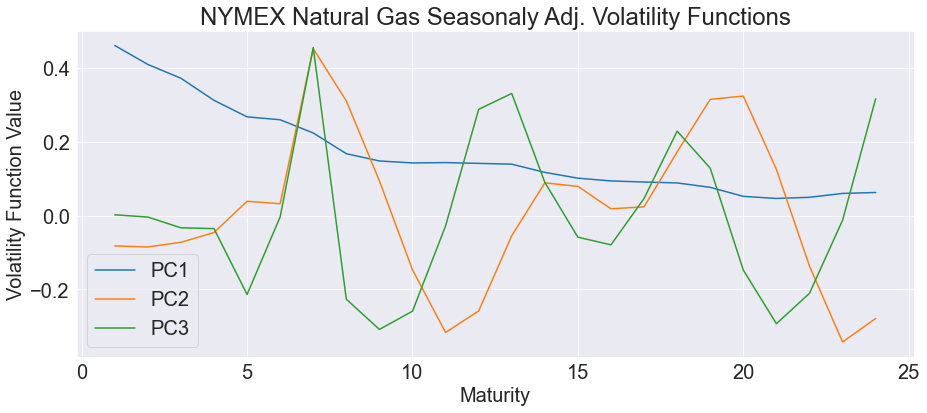

In [985]:
plt.figure(figsize=(15, 6))
colors = ['r', 'g', 'b', 'c']  # Colors for each component
labels = [f'PC{i+1}' for i in range(pca.n_components_)]  # Labels for each component
for i in range(3):
    plt.plot(np.arange(1, 25), pca.components_[i], linestyle='-', label=labels[i])
plt.xlabel('Maturity')
plt.ylabel('Volatility Function Value')  # Update with your desired y-axis label
plt.title('NYMEX Natural Gas Seasonaly Adj. Volatility Functions')
plt.legend()
plt.show()

<h4 style="text-align: left;">7.4 Pricing via Monte Carlo Simulations</h4>

In [709]:
def martingale(noise_array, expiry):
    
    eigen_vects = pca.components_[expiry-1][0:len(noise_array)]
    eigen_vals = pca.explained_variance_[0:len(noise_array)]
    
    drift = -0.5*np.dot(eigen_vects**2, eigen_vals)
    diffusion = np.dot(eigen_vects * np.sqrt(eigen_vals), noise_array)
    
    path = drift + diffusion
    
    return path

In [849]:
def price_asian_option(spot, strike, expiry, discount_rate, num_simulations, seq_type='QMC'):

    num_evects = 5
    discount_factor = np.exp(-discount_rate*expiry/12)
    
    if seq_type == 'QMC':       
        # Low Discrepency Sequence ~N(0,1)
        sampler = qmc.Halton(d=num_simulations, scramble=True)
        noise = sampler.random(n=num_evects*num_evects*expiry)
        noise = norm.ppf(noise.T)
    elif seq_type == 'pseudo':
        # Pseudo Random Sequence ~N(0,1)
        noise = np.random.normal(0, 1, size=(num_simulations,expiry,num_evects,num_evects))
    
    price = np.reshape(noise, (num_simulations, expiry, num_evects, num_evects))
    price = np.apply_along_axis(martingale, 3, price, expiry)
    price = np.exp(price.sum(axis=2))
    price = spot*np.mean(price, axis=1)-strike
    # Set values less than zero to zero using np.clip()
    price = np.clip(price, a_min=0, a_max=None)
    price = discount_factor*np.mean(price)
    
    return price

In [816]:
expiry = 3 # monthly
strike = 2.4 # $/mmbtu
discount_rate = 0.0352 # based on 10 year
current_price = 2.395
sims = 10

In [960]:
strikes = np.linspace(0,4,20).round(1)
expirations = np.arange(1,25)
data = np.random.rand(len(strikes), len(expirations))
call_curve_df = pd.DataFrame(data, columns=expirations, index=strikes)
for col in np.arange(len(call_curve_df.columns)):
    for row in np.arange(len(call_curve_df.index)):
        call_curve_df.iloc[row][col] = price_asian_option(current_price, strikes[row], expirations[col], discount_rate, sims)

<AxesSubplot:title={'center':'Model Curve / All Maturities'}, xlabel='Strikes', ylabel='Call Price'>

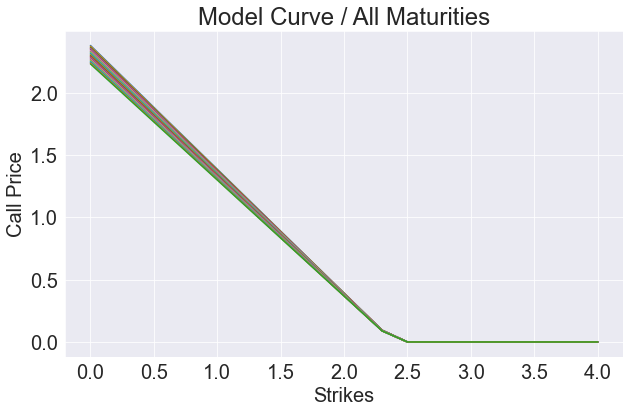

In [1004]:
call_curve_df.iloc[:, :23].plot(figsize=(10, 6), xlabel='Strikes', ylabel='Call Price', title='Model Curve / All Maturities', legend=False)

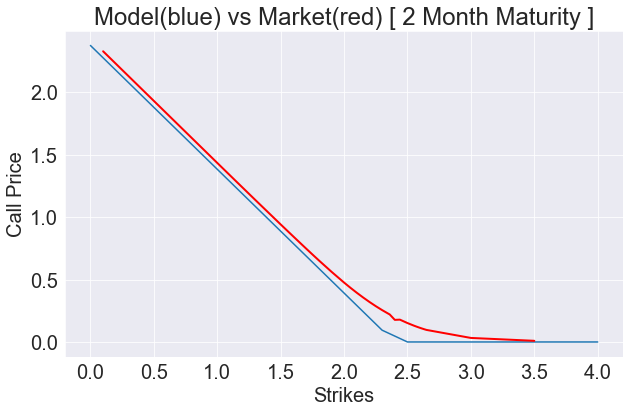

In [962]:
call_curve_df.iloc[:, 1:2].plot(figsize=(10, 6), xlabel='Strikes', ylabel='Call Price', title='Model(blue) vs Market(red) [ 2 Month Maturity ]', legend=False)
market_strike = np.asarray([0.1,1.0,1.15,1.3,1.5,1.6,1.7,1.75,1.8,1.9,2.0,2.05,2.1,2.15,2.2,2.25,2.3,2.35,2.36,2.4,2.44,2.5,2.55,2.57,2.58,2.59,2.6,2.61,2.63,2.65,3.0,3.5])
market_price = np.asarray([2.3273,1.4337,1.2851,1.1371,0.9412,0.8444,0.7485,0.7011,0.6542,0.5629,0.4755,0.4340,0.3943,0.3564,0.3205,0.2867,0.2552,0.2259,0.2203,0.177,0.1788,0.1514,0.1310,0.1234,0.1198,0.1162,0.1127,0.1093,0.1027,0.0965,0.0323,0.0093])
plt.plot(market_strike, market_price, label='New Curve', color='red', linewidth=2)

In [999]:
strike = 2
spot = 2.3
print(f'Using Low Discrepancy Sequence (Halton): At spot ${spot} and strike ${strike}')
for num_simulation in [1,10,100,1000,10000]:
    prices_mc = []
    for i in range(10):
        price_mc = price_asian_option(spot, strike, expiry, discount_rate, num_simulations)
        prices_mc.append(price_mc)
        
    print(f'{10*num_simulation} Simulations | mean={np.mean(prices_mc)} | stdv={np.std(prices_mc)}')

Using Low Discrepancy Sequence (Halton): At spot $2.3 and strike $2
10 Simulations | mean=0.2972482334230625 | stdv=0.0004080134491919931
100 Simulations | mean=0.2975912546578854 | stdv=0.0005538830273632602
1000 Simulations | mean=0.2972084182897889 | stdv=0.0005402897907193125
10000 Simulations | mean=0.2973288165963779 | stdv=0.0005566453739790074
100000 Simulations | mean=0.297365932830595 | stdv=0.00042614380931477706


In [998]:
print(f'Using Pseudo Random Sequence (Mersenne Twister): At spot ${spot} and strike ${strike}')
for num_simulation in [1,10,100,1000,10000]:
    prices_mc = []
    for i in range(10):
        price_mc = price_asian_option(spot, strike, expiry, discount_rate, num_simulations, seq_type='pseudo')
        prices_mc.append(price_mc)
        
    print(f'{10*num_simulation} Simulations| mean={np.mean(prices_mc)} | stdv={np.std(prices_mc)}')

Using Pseudo Random Sequence (Mersenne Twister): At spot $2.3 and strike $2
10 Simulations| mean=0.2974174681691234 | stdv=0.00016824105670416384
100 Simulations| mean=0.29739876215806377 | stdv=0.00011599901453505831
1000 Simulations| mean=0.29732371387412726 | stdv=0.00016420203271013623
10000 Simulations| mean=0.2973210796198736 | stdv=0.00021541479234521855
100000 Simulations| mean=0.2974153926114188 | stdv=0.0001673673349346589


<h4 style="text-align: left;">7.5 Implementing Antithetic Variate</h4>

In [850]:
def price_aop_antithetic(spot, strike, expiry, discount_rate, num_simulations, seq_type='QMC'):

    num_evects = 4
    discount_factor = np.exp(-discount_rate*expiry/12)
    
    if seq_type == 'QMC':       
        # Low Discrepency Sequence ~N(0,1)
        sampler = qmc.Halton(d=num_simulations, scramble=True)
        noise = sampler.random(n=num_evects*num_evects*expiry)
        noise = norm.ppf(noise.T)
    elif seq_type == 'pseudo':
        # Pseudo Random Sequence ~N(0,1)
        noise = np.random.normal(0, 1, size=(num_simulations,expiry,num_evects,num_evects))
        
    noise_anti = -1*noise
    
    price = np.reshape(noise, (num_simulations, expiry, num_evects, num_evects))
    price = np.apply_along_axis(martingale, 3, price, expiry)
    price = np.exp(price.sum(axis=2))
    price = spot*np.mean(price, axis=1)-strike
    # Set values less than zero to zero using np.clip()
    price = np.clip(price, a_min=0, a_max=None)
    price = discount_factor*np.mean(price)
    
    price_anti = np.reshape(noise_anti, (num_simulations, expiry, num_evects, num_evects))
    price_anti = np.apply_along_axis(martingale, 3, price_anti, expiry)
    price_anti = np.exp(price_anti.sum(axis=2))
    price_anti = spot*np.mean(price_anti, axis=1)-strike
    # Set values less than zero to zero using np.clip()
    price_anti = np.clip(price_anti, a_min=0, a_max=None)
    price_anti = discount_factor*np.mean(price_anti)
    
    return 0.5*(price+price_anti)

In [1000]:
print(f'Appying Antithetic Variance Method: At spot ${spot} and strike ${strike}')
for num_simulation in [1,10,100,1000,10000]:
    prices_mc = []
    for i in range(10):
        price_mc = price_aop_antithetic(spot, strike, expiry, discount_rate, num_simulations, seq_type='pseudo')
        prices_mc.append(price_mc)
        
    print(f'{10*num_simulation} Simulations| mean={np.mean(prices_mc)} and stdv={np.std(prices_mc)}')

Appying Antithetic Variance Method: At spot $2.3 and strike $2
10 Simulations| mean=0.297371579971776 and stdv=9.945152129289454e-09
100 Simulations| mean=0.29737158821021037 and stdv=1.642734298742046e-08
1000 Simulations| mean=0.29737158689328924 and stdv=1.8820317128627016e-08
10000 Simulations| mean=0.29737157711202 and stdv=1.4658487713182772e-08
100000 Simulations| mean=0.2973715752554201 and stdv=1.1969355643520687e-08


In [22]:
import math
from scipy.stats import norm

def asian_option_price_geo(S, K, T, r, sigma, n, option_type='call'):
    """
    Calculates the price of a European-style geometric Asian option using the Black-Scholes model.

    Parameters:
    S (float): Current stock price.
    K (float): Strike price.
    T (float): Time to expiration (in years).
    r (float): Risk-free interest rate.
    sigma (float): Volatility of the underlying asset.
    n (int): Number of averaging periods.
    option_type (str): Type of option ('call' or 'put').

    Returns:
    float: Price of the Asian option.
    """
    mu = (r - 0.5 * sigma ** 2) * (n + 1) / (2 * n)
    sigma_hat = sigma * math.sqrt((2 * n + 1) / (6 * n))
    d1 = (math.log(S / K) + (mu + 0.5 * sigma_hat ** 2) * T) / (sigma_hat * math.sqrt(T))
    d2 = d1 - sigma_hat * math.sqrt(T)
    if option_type == 'call':
        return S * math.exp((mu - r) * T) * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return K * math.exp(-r * T) * norm.cdf(-d2) - S * math.exp((mu - r) * T) * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Must be 'call' or 'put'.")


In [23]:
S = 2.3
K = 2
T = 0.25
r = 0.0352
sigma = 0.53
n = 3

option_type = 'call'
price = asian_option_price_geo(S, K, T, r, sigma, n, option_type)
print(f"Price of the {option_type} option: {price}")


Price of the call option: 0.30414544440359026


In [24]:
spot_curve.rolling(window=30).std().mean()

0.5373279873840778